<a href="https://colab.research.google.com/github/Azariagmt/Ad-campaign-performance/blob/main/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown "https://drive.google.com/uc?id=1iVNXgceF7uk3MaPwYcysQpE-Jj5WX5DV"


Downloading...
From: https://drive.google.com/uc?id=1iVNXgceF7uk3MaPwYcysQpE-Jj5WX5DV
To: /content/AdSmartABdata.csv
100% 784k/784k [00:00<00:00, 3.67MB/s]


# Imports

In [2]:
import pandas as pd

In [27]:
df = pd.read_csv('/content/AdSmartABdata.csv', index_col="auction_id")
df.head()

,experiment,date,hour,device_make,platform_os,browser,yes,no
auction_id,,,,,,,,
0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [28]:
for col in df.columns.tolist():
  print(f'{col}\'s unique values are {df[col].unique()}')

experiment's unique values are ['exposed' 'control']
date's unique values are ['2020-07-10' '2020-07-07' '2020-07-05' '2020-07-03' '2020-07-09'
 '2020-07-04' '2020-07-06' '2020-07-08']
hour's unique values are [ 8 10  2 15  5  0 14 13  6 16  7 20  4 17  1 19 18  3 23 12  9 11 21 22]
device_make's unique values are ['Generic Smartphone' 'E5823' 'Samsung SM-A705FN' 'Samsung SM-G960F'
 'Samsung SM-G973F' 'iPhone' 'Samsung SM-G935F' 'HTC One' 'LG-$2'
 'Samsung SM-A202F' 'XT1032' 'COL-L29' 'Samsung SM-N960U1'
 'Samsung SM-A715F' 'Samsung SM-G930F' 'I3312' 'Samsung SM-G950F'
 'FIG-LX1' 'Samsung SM-G920F' 'MRD-LX1' 'Samsung SM-N950F' 'Moto $2'
 'Samsung SM-G970F' 'Samsung GT-I9505' 'Samsung SM-G981B' 'Pixel 3a'
 'Samsung SM-J600FN' 'Samsung SM-A105FN' 'OnePlus ONEPLUS A3003' 'POT-LX1'
 'Samsung SM-G975F' 'Samsung SM-J330FN' 'Samsung SM-G770F' 'H3311'
 'MAR-LX1A' 'HTC One $2' 'Samsung SM-G965F' 'ELE-L09' 'Samsung SM-J415FN'
 'Samsung SM-G900F' 'Lenovo A1010a20' 'CLT-L09' 'HTC Desire $2'
 'Sams

In [29]:
df['experiment'].value_counts()

control    4071
exposed    4006
Name: experiment, dtype: int64

In [30]:
df.sort_values(by=['date'], key=pd.to_datetime)
df.head()

,experiment,date,hour,device_make,platform_os,browser,yes,no
auction_id,,,,,,,,
0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [55]:
exposure_grp = df.groupby('experiment')

In [64]:
exposure_grp.get_group('control')

,experiment,date,hour,device_make,platform_os,browser,yes,no
auction_id,,,,,,,,
818f37f3-dae8-4a33-a22e-e54056e0ba7d,control,2020-07-03,15,Samsung SM-A600FN,6,Chrome Mobile WebView,0,0
6be2edc7-cf48-4831-8edf-3694eb241e09,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
6c3987e1-42ab-4bca-b1c9-3c6e4446f7eb,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
6ca38532-3f9f-4dd3-a673-83ec4e319f0a,control,2020-07-03,15,Samsung SM-A202F,6,Samsung Internet,0,0
6caba6ce-35dc-40a5-b79f-05a758ed8654,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...
9b86aed1-508d-4532-8028-fbaed5d74ee3,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,0
9b0b9843-4898-4d85-a3ad-9d4004cb4bcc,control,2020-07-10,8,Samsung SM-G930F,6,Chrome Mobile WebView,1,0
9a041a14-9aef-45a0-9595-6264748ef728,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,0


In [73]:
exposure_grp['yes'].value_counts().index

MultiIndex([('control', 0),
            ('control', 1),
            ('exposed', 0),
            ('exposed', 1)],
           names=['experiment', 'yes'])

In [60]:
exposure_grp['no'].value_counts()

experiment  no
control     0     3749
            1      322
exposed     0     3657
            1      349
Name: no, dtype: int64

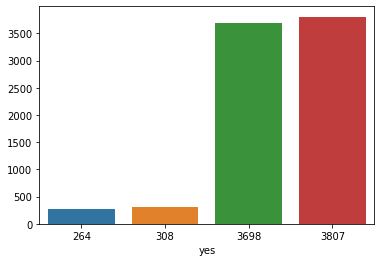

In [61]:
sns.barplot(x= exposure_grp['yes'].value_counts().index, y=exposure_grp['yes'].value_counts().values,data=exposure_grp['yes'].value_counts())

In [76]:
respondents_series = df.groupby(['experiment','yes', 'no']).size()
respondents_series

experiment  yes  no
control     0    0     3485
                 1      322
            1    0      264
exposed     0    0     3349
                 1      349
            1    0      308
dtype: int64

In [74]:
df.shape

(8077, 8)

### Out of 8077 respondents 6834 skipped the question 671 answered no and only 572 saw the ad

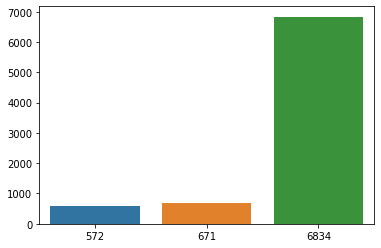

In [71]:
ax = sns.barplot(x=respondents_series.index, y=respondents_series.values, data=respondents_series)

In [32]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

experiment             object
date           datetime64[ns]
hour                    int64
device_make            object
platform_os             int64
browser                object
yes                     int64
no                      int64
dtype: object

## Date Based analysis

In [77]:
df = df.sort_values(by = 'date')

In [44]:
date_series = df['date'].value_counts().sort_index()

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

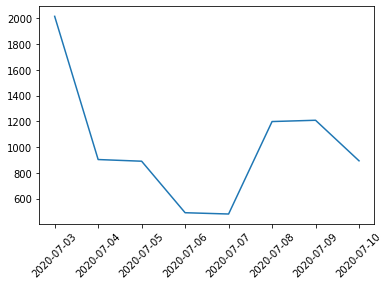

In [47]:
ax = sns.lineplot(x= date_series.index, y = date_series.values)
plt.setp(ax.get_xticklabels(), rotation=45)

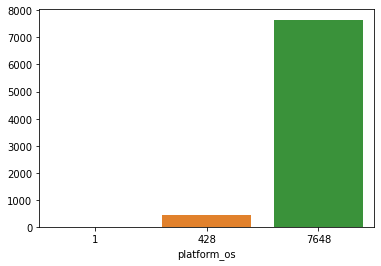

In [53]:
platform_series = df['platform_os'].value_counts()
sns.barplot(x = platform_series.index, y= platform_series.values, data=platform_series)

In [ ]:
browser_series = 

## Based on date how much did BIO increase

In [84]:
bio_series = df.groupby(['date','experiment','yes', 'no']).size()
bio_series

date        experiment  yes  no
2020-07-03  control     0    0     1312
                             1      129
                        1    0      104
            exposed     0    0      378
                             1       49
                        1    0       43
2020-07-04  control     0    0      358
                             1       38
                        1    0       30
            exposed     0    0      386
                             1       45
                        1    0       46
2020-07-05  control     0    0      319
                             1       26
                        1    0       17
            exposed     0    0      454
                             1       39
                        1    0       35
2020-07-06  control     0    0      170
                             1       14
                        1    0       12
            exposed     0    0      246
                             1       25
                        1    0       23
2020-07-

In [143]:
for date, new_df in bio_series.groupby(level=0):
  print(date)
  for experiment, new_df in bio_series.groupby(level=1):
    print(experiment)
    for value in new_df.values:
      pass
    # print(new_df.groupby('date').value_counts().index)
    # control_data = new_df.groupby('date').value_counts().index
    # print(new_df)
    new_df = pd.DataFrame(new_df)
    # print(new_df)
    new_df['percent'] = new_df.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))
    print(new_df)
    # control_data = new_df.groupby('date')
    break
  break

2020-07-03 00:00:00
control
                                 0  percent
date       experiment yes no               
2020-07-03 control    0   0   1312     0.85
                          1    129     0.08
                      1   0    104     0.07
2020-07-04 control    0   0    358     0.84
                          1     38     0.09
                      1   0     30     0.07
2020-07-05 control    0   0    319     0.88
                          1     26     0.07
                      1   0     17     0.05
2020-07-06 control    0   0    170     0.87
                          1     14     0.07
                      1   0     12     0.06
2020-07-07 control    0   0    186     0.83
                          1     21     0.09
                      1   0     16     0.07
2020-07-08 control    0   0    426     0.88
                          1     31     0.06
                      1   0     27     0.06
2020-07-09 control    0   0    415     0.86
                          1     35     0.07
    

In [151]:
unstacked_df = new_df.unstack(level=[2,3])
unstacked_df = unstacked_df.reset_index(level=1, drop=True)
# df.reset_index(level=2, drop=True)

In [153]:
unstacked_df.head()

0           percent            
yes            0         1       0           1
no             0    1    0       0     1     0
date                                          
2020-07-03  1312  129  104    0.85  0.08  0.07
2020-07-04   358   38   30    0.84  0.09  0.07
2020-07-05   319   26   17    0.88  0.07  0.05
2020-07-06   170   14   12    0.87  0.07  0.06
2020-07-07   186   21   16    0.83  0.09  0.07

In [154]:
unstacked_df['percent']

yes            0           1
no             0     1     0
date                        
2020-07-03  0.85  0.08  0.07
2020-07-04  0.84  0.09  0.07
2020-07-05  0.88  0.07  0.05
2020-07-06  0.87  0.07  0.06
2020-07-07  0.83  0.09  0.07
2020-07-08  0.88  0.06  0.06
2020-07-09  0.86  0.07  0.06
2020-07-10  0.84  0.08  0.08

In [165]:
unstacked_df.columns = unstacked_df.columns.droplevel()
unstacked_df.columns = unstacked_df.columns.droplevel()
# df.columns = df.columns.droplevel()
unstacked_df

no,0,1,0,0,1,0
date,,,,,,
2020-07-03,1312,129,104,0.85,0.08,0.07
2020-07-04,358,38,30,0.84,0.09,0.07
2020-07-05,319,26,17,0.88,0.07,0.05
2020-07-06,170,14,12,0.87,0.07,0.06
2020-07-07,186,21,16,0.83,0.09,0.07
2020-07-08,426,31,27,0.88,0.06,0.06
2020-07-09,415,35,30,0.86,0.07,0.06
2020-07-10,299,28,28,0.84,0.08,0.08


In [178]:
unstacked_df.columns = ["Original:00","Original:01","Original:10","Percent:00","Percent:01","Percent:10"]
unstacked_df

,Original:00,Original:01,Original:10,Percent:00,Percent:01,Percent:10
date,,,,,,
2020-07-03,1312,129,104,0.85,0.08,0.07
2020-07-04,358,38,30,0.84,0.09,0.07
2020-07-05,319,26,17,0.88,0.07,0.05
2020-07-06,170,14,12,0.87,0.07,0.06
2020-07-07,186,21,16,0.83,0.09,0.07
2020-07-08,426,31,27,0.88,0.06,0.06
2020-07-09,415,35,30,0.86,0.07,0.06
2020-07-10,299,28,28,0.84,0.08,0.08


In [180]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(unstacked_df[["Percent:00",	"Percent:01",	"Percent:10"]])

In [181]:
scaled_df

array([[0.4       , 0.66666667, 0.66666667],
       [0.2       , 1.        , 0.66666667],
       [1.        , 0.33333333, 0.        ],
       [0.8       , 0.33333333, 0.33333333],
       [0.        , 1.        , 0.66666667],
       [1.        , 0.        , 0.33333333],
       [0.6       , 0.33333333, 0.33333333],
       [0.2       , 0.66666667, 1.        ]])

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

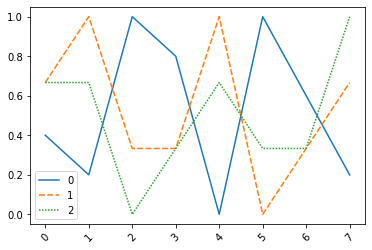

In [182]:
ax = sns.lineplot(data=scaled_df)
plt.setp(ax.get_xticklabels(), rotation=45)

In [ ]:
ax = sns.lineplot(x= date_series.index, y = date_series.values)
plt.setp(ax.get_xticklabels(), rotation=45)